# 01_titanic_EDA2
Autor: Carlos Wong <br/>
Fecha: 2022_01_16 <br/>
Tipo de problema: CLASIFICACIÓN <br/>
Entradas: 'train', 'test', 'gender_submission' kaggle competition (titanic) <br/>
Salidas: Submission ('PassengerId','Survived')  <br/>
Propósito: Práctica de análisis, visualización, entrenamiento, predicción y documentación

## 1. LIBRERÍAS Y EXTRACCIÓN DE DATOS 

In [709]:
# librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [710]:
# extracción de datasets
train = pd.read_excel(r'.\train.xlsx')
test = pd.read_csv(r'.\test.csv')
gender_submission = pd.read_csv(r'.\gender_submission.csv')

In [711]:
# se muestra el tipo de submission: 'PassengerId' -> Id del pasajero / 'Survived' -> predicción (int) 
gender_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [712]:
# Se extraen los PassengerId del dataset 'test' para completar fichero submission
PassengerId = test['PassengerId']

## 3. Exploratory Data Analysis (EDA)

In [713]:
# test.survived no existe
traincolumns = train.columns.tolist()
testcolumns = test.columns.tolist()
print(traincolumns)
print(testcolumns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [714]:
# (<-): Cambios
# train.age: missings <-
# train.cabin: missings <-
# train.embarked: missings <-
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [715]:
# (<-): Cambios
# train.age: missings
# train.cabin: missings
# train.embarked: missings
# test.age: missings <-
# test.fare: missings <-
# test.cabin: missings <-
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [716]:
# Se unen ambos datasets para aplicar el mismo tratamiento de missings y extracciones
# Al no tener las mismas columnas, los valores de 'Survived' se cumplimentan automáticamente con missing (NaN)
full = pd.concat([train, test])

In [717]:
# (<-): Cambios
# full.age: missings <-
# full.cabin: missings <-
# full.embarked: missings <-
# full.fare: missings <-
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [718]:
# SIN CAMBIOS
# full.age: missings
# full.cabin: missings
# full.embarked: missings
# full.fare: missings
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [719]:
# (<-): Cambios
# full.age: missings
# full.sex: onehotencoder <-
# full.cabin: missings
# full.embarked: missings, onehotencoder <-
# full.fare: missings
full.describe()
full.describe(exclude="number")

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,1003,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [720]:
# (<-): Cambios
# full.survived: floatToInt <-
# full.pclass: 
# full.name: feature_split <-
# full.sex: onehotencoder
# full.age: missings
# full.sibsp: 
# full.parch:
# full.ticket: feature_split <-
# full.fare: 
# full.cabin: missings, feature_split <-
# full.embarked: missings, onehotencoder
# full.fare: missings, normalization
full.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


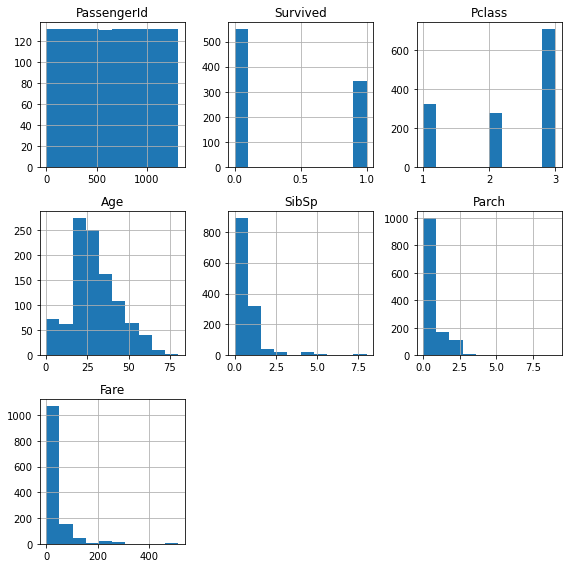

In [721]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder <- 
# full.name: feature_split
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization <-
# full.sibsp: grouping <-
# full.parch: grouping <-
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  <-
# full.cabin: missings, feature_split
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
full.hist(figsize=(8,8)) 
plt.tight_layout()
plt.show()

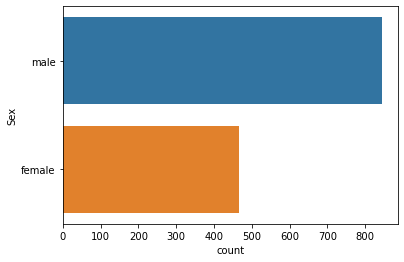

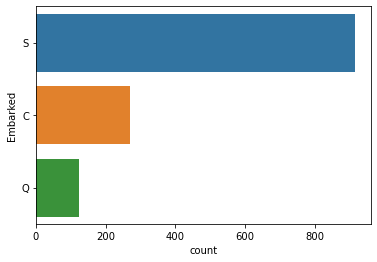

In [722]:
# SIN CAMBIOS
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.name: feature_split
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.cabin: missings, feature_split
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
for column in full.select_dtypes(include='object'):
    if full[column].nunique() < 10:
        sns.countplot(y=column, data=full)
        plt.show()

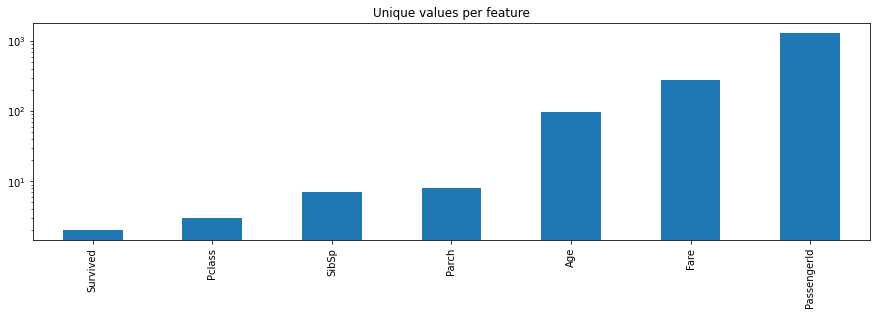

In [723]:
# SIN CAMBIOS
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.name: feature_split
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.cabin: missings, feature_split
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
unique_values = full.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title="Unique values per feature");

In [724]:
# sin filas duplicadas
n_duplicates = full.drop(labels=["PassengerId"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicate(s) in your database.")

You seem to have 0 duplicate(s) in your database.


In [725]:
# extracción de duplicados (en caso de que los hubiera)
columns_to_consider = train.drop(labels=["PassengerId"], axis=1).columns
full = full.drop_duplicates(subset=columns_to_consider)

## missings

In [726]:
# volumen de missings (formato numérico)
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

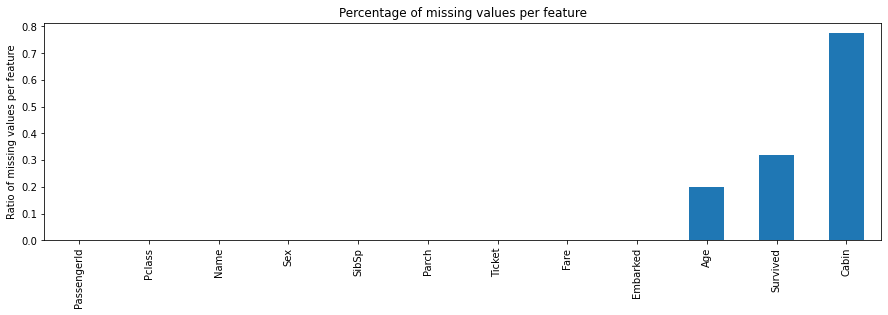

In [727]:
# % de missings (formato gráfico)
full.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [728]:
# Función para extracción de código de cabina
def assignDeckValue(CabinCode):
    '''No value="Unknown" else extract the first letter of the cabin
       Value= Fill with th word Unknown'''
    if pd.isnull(CabinCode):
        category = 'Unknown'
    else:
        category = CabinCode[0]
    return category

In [729]:
# Creación de nueva columna 'Deck' a partir de 'Cabin' 
Deck = np.array([assignDeckValue(cabin) for cabin in full['Cabin'].values])
Deck[0:5]

array(['Unknown', 'C', 'Unknown', 'C', 'Unknown'], dtype='<U7')

In [730]:
full = full.assign(Deck = Deck)
full.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


In [731]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.name: feature_split
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.cabin: <-------------
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: feature_split
full.drop(['Cabin'], 1, inplace=True) 

In [732]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.name: feature_split
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: grouping  <-------------
full['Deck'].value_counts()

Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Deck, dtype: int64

Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Deck, dtype: int64


C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


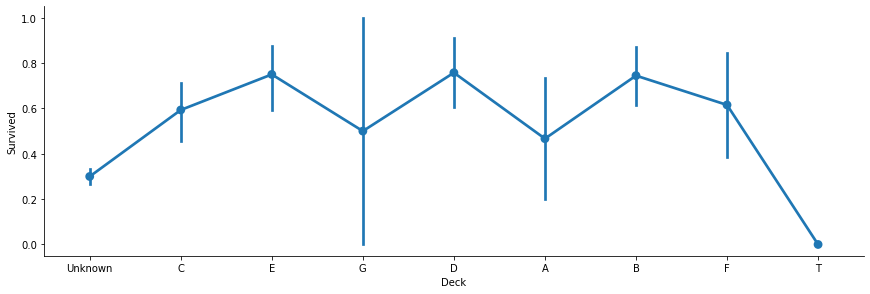

In [733]:
print(full["Deck"].value_counts())
sns.factorplot('Deck','Survived', data=full,size=4,aspect=3)

In [734]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.name: feature_split
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  <-------------
full['Deck'] = full['Deck'].replace(['A','B','C','D','E','F','G','T'], 'hascabin')
full['Deck'] = full['Deck'].replace(['Unknown'], 'nocabin')

In [735]:
full['Deck'].value_counts()

nocabin     1014
hascabin     295
Name: Deck, dtype: int64

In [736]:
full.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,nocabin
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,hascabin


In [737]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.name: feature_split  <-------------
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  

# Código para creación de columna 'Title' a partir de 'Name'
full['Title'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [738]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.name:  <-------------
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  
full.drop(['Name'], 1, inplace=True) 

In [739]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  
# full.title: grouping <-------------
full['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Countess      1
Don           1
Jonkheer      1
Capt          1
Dona          1
Sir           1
Lady          1
Mme           1
Name: Title, dtype: int64

<AxesSubplot:>

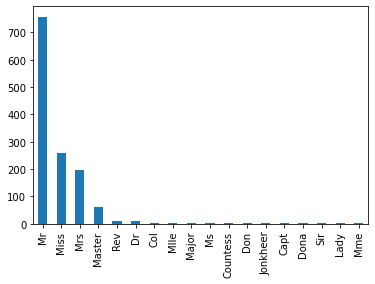

In [740]:
full['Title'].value_counts().plot(kind='bar')

In [741]:
means = full.groupby('Title')['Age'].mean()
means

Title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [742]:
# extracción de lista de títulos
title_list = list(set(full['Title'].to_list()))

In [743]:
# función para asignar edad media a títulos con missings
def age_missing_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) 

In [744]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.sex: onehotencoder
# full.age: missings, outliers, binning/normalization <-------------
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  
# full.title: grouping 
age_missing_replace(means, full, title_list)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

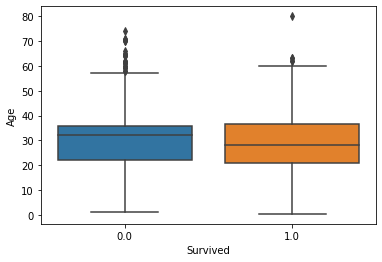

In [745]:
# observación de outliers
# no se pueden eliminar outliers porque pueden aplicar a filas del dataset 'test' 
sns.boxplot(x="Survived", y="Age",data= full)

In [746]:
# Se agrupa Dr_female a 'Mrs' y Dr_male a 'Mr'
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  
# full.title: grouping  <-------------
full['Title'] = np.where((full['Title'] == 'Dr') & (full['Sex'] == 'female') , 'Mrs', full['Title'])
full['Title'] = np.where((full['Title'] == 'Dr') & (full['Sex'] == 'male') , 'Mr', full['Title'])

In [747]:
# Se agrupan el resto de titles con las siguientes categorías
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  
# full.title: grouping  <-------------
full['Title'] = full['Title'].replace(['Rev','Col','Major','Sir','Jonkheer','Capt','Don'], 'Mr')
full['Title'] = full['Title'].replace(['Mme','Lady','Dona','Countess'], 'Mrs')
full['Title'] = full['Title'].replace(['Mlle','Ms'], 'Miss')

<AxesSubplot:>

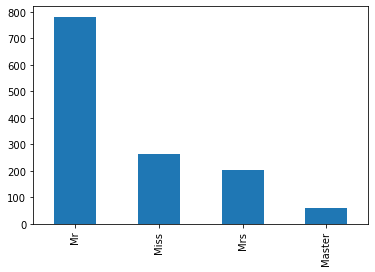

In [748]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: missings, onehotencoder
# full.fare: missings, binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  <-------------
full['Title'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

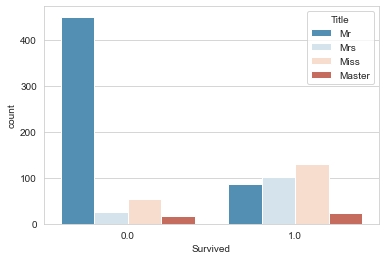

In [775]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Title', data=full, palette='RdBu_r')

In [749]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: grouping 
# full.parch: grouping 
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder   <-------------
# full.fare: binning/normalization   <-------------
# full.deck: onehotencoder  
# full.title: onehotencoder  
full['Fare'].fillna(full['Fare'].mode()[0], inplace = True)
full['Embarked'].fillna(full['Embarked'].mode()[0], inplace = True)

<AxesSubplot:>

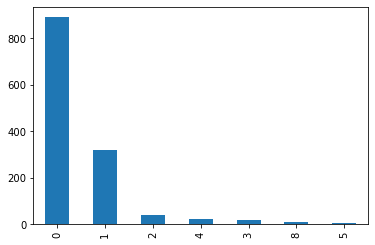

In [750]:
full['SibSp'].value_counts().plot(kind='bar')

<AxesSubplot:>

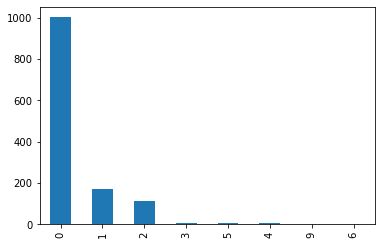

In [751]:
full['Parch'].value_counts().plot(kind='bar')

In [752]:
full.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,nocabin,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,hascabin,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,nocabin,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,hascabin,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,nocabin,Mr


In [753]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: onehotencoder   <-------------
# full.parch: onehotencoder   <-------------
# full.ticket: feature_split
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder
# full.fare: binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  
full['SibSp'] = full['SibSp'].replace([0], 'SibSpNo')
full['SibSp'] = full['SibSp'].replace([1,2,3,4,5,8], 'SibSpYes')
full['Parch'] = full['Parch'].replace([0], 'ParchNo')
full['Parch'] = full['Parch'].replace([1,2,3,4,5,6,9], 'ParchYes')

In [754]:
full['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
PC 17608         7
S.O.C. 14879     7
1601             7
                ..
343275           1
2678             1
PC 17609         1
330979           1
36864            1
Name: Ticket, Length: 1003, dtype: int64

In [756]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: onehotencoder
# full.parch: onehotencoder
# full.ticket: feature_split   <-------------
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder
# full.fare: binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  
# full.ticket_type:   <-------------
# full.ticket_num:   <-------------
full[['Ticket_type', 'Ticket_num']] = full['Ticket'].str.split(' ', 1, expand=True)
full['Ticket_num'].fillna(full['Ticket'], inplace = True)

In [757]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: onehotencoder
# full.parch: onehotencoder
# full.ticket: feature_split   <-------------
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder
# full.fare: binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  
# full.ticket_type: 
# full.ticket_num: 
full.drop(['Ticket'], 1, inplace=True) 

In [758]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: onehotencoder
# full.parch: onehotencoder
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder
# full.fare: binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  
# full.ticket_type (first part of 'Ticket'): grouping
# full.ticket_num (second part of 'Ticket'): to_drop   <-------------
# full.ticket_num_1 (first part of 'Ticket_num'): to_drop   <-------------
# full.ticket_num_2 (second part of 'Ticket_num'): feature_split   <-------------
full[['Ticket_num_1', 'Ticket_num_2']] = full['Ticket_num'].str.split(' ', 1, expand=True)
full['Ticket_num_2'].fillna(full['Ticket_num'], inplace = True)

In [759]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder 
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: onehotencoder
# full.parch: onehotencoder
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder
# full.fare: binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  
# full.ticket1 (first part of 'Ticket'): grouping
# full.ticket2_2 (second part of 'Ticket_2'): binning/normalization   <-------------
full.drop(['Ticket_num','Ticket_num_1'], 1, inplace=True) 

In [760]:
full.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Ticket_type,Ticket_num_2
0,1,0.0,3,male,22.0,SibSpYes,ParchNo,7.2500,S,nocabin,Mr,A/5,21171
1,2,1.0,1,female,38.0,SibSpYes,ParchNo,71.2833,C,hascabin,Mrs,PC,17599
2,3,1.0,3,female,26.0,SibSpNo,ParchNo,7.9250,S,nocabin,Miss,STON/O2.,3101282
3,4,1.0,1,female,35.0,SibSpYes,ParchNo,53.1000,S,hascabin,Mrs,NaN,113803
4,5,0.0,3,male,35.0,SibSpNo,ParchNo,8.0500,S,nocabin,Mr,NaN,373450


In [761]:
full['Ticket_type'].value_counts()

PC            92
C.A.          46
SOTON/O.Q.    16
W./C.         14
STON/O        14
              ..
364858         1
SC/A4          1
228414         1
349220         1
3470           1
Name: Ticket_type, Length: 315, dtype: int64

In [765]:
full[full['Pclass'] == 1]['Ticket_type'].value_counts()

PC        92
113503     4
F.C.       3
16966      3
13236      2
W.E.P.     2
21228      2
112378     2
33638      2
WE/P       2
19950      2
13050      2
36928      2
11778      2
12749      2
113781     2
13508      2
13695      2
112051     1
19924      1
111163     1
113796     1
17463      1
112377     1
19877      1
11813      1
694        1
113778     1
113780     1
11753      1
19928      1
113054     1
113038     1
112901     1
11769      1
113791     1
113044     1
110489     1
17770      1
113773     1
11765      1
110469     1
17475      1
113801     1
24160      1
112058     1
680        1
17464      1
113790     1
11770      1
17765      1
13567      1
113059     1
113795     1
13905      1
11767      1
113509     1
2543       1
110813     1
Name: Ticket_type, dtype: int64

In [766]:
full[full['Pclass'] == 2]['Ticket_type'].value_counts()

C.A.        31
SC/PARIS    11
F.C.C.       9
S.O.C.       7
SC/Paris     5
            ..
SC/A.3       1
244358       1
248738       1
237249       1
W/C          1
Name: Ticket_type, Length: 71, dtype: int64

In [767]:
full[full['Pclass'] == 3]['Ticket_type'].value_counts()

SOTON/O.Q.    16
C.A.          15
STON/O        14
A/5           12
CA.           12
              ..
349910         1
2688           1
330971         1
349232         1
3470           1
Name: Ticket_type, Length: 189, dtype: int64

In [768]:
full[full['Pclass'] == 1]['Ticket_num_2'].value_counts()

17608     7
17757     5
19950     4
17421     4
113760    4
         ..
111426    1
17318     1
113795    1
17605     1
13568     1
Name: Ticket_num_2, Length: 211, dtype: int64

In [769]:
full[full['Pclass'] == 2]['Ticket_num_2'].value_counts()

14879     7
34651     4
2123      4
33112     4
239853    3
         ..
13531     1
244358    1
236853    1
751       1
2168      1
Name: Ticket_num_2, Length: 210, dtype: int64

In [770]:
full[full['Pclass'] == 3]['Ticket_num_2'].value_counts()

2343      11
2144       8
1601       7
347082     7
347088     6
          ..
345778     1
345779     1
345780     1
345781     1
36864      1
Name: Ticket_num_2, Length: 580, dtype: int64

In [705]:
# El ticket_type y ticket_num hacen referencia a la clase, pero las clases ya están claramente difinidas
# Se eliminan las nuevas variables
full[['Ticket_num_2','Pclass']]

,Ticket_num_2,Pclass
0,21171,3
1,17599,1
2,3101282,3
3,113803,1
4,373450,3
...,...,...
413,3236,3
414,17758,1
415,3101262,3
416,359309,3


In [771]:
# (<-): Cambios
# full.survived: floatToInt
# full.pclass: ordinalencoder
# full.sex: onehotencoder
# full.age: outliers, binning/normalization 
# full.sibsp: onehotencoder
# full.parch: onehotencoder
# full.fare: outliers, binning/normalization  
# full.embarked: onehotencoder
# full.fare: binning/normalization
# full.deck: onehotencoder  
# full.title: onehotencoder  
# full.ticket1 (first part of 'Ticket'): grouping    <-------------
# full.ticket2_2 (second part of 'Ticket_2'): binning/normalization   <-------------
full.drop(['Ticket_type','Ticket_num_2'], 1, inplace=True) 

In [772]:
full.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Deck             0
Title            0
dtype: int64

In [773]:
full.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0.0,3,male,22.0,SibSpYes,ParchNo,7.2500,S,nocabin,Mr
1,2,1.0,1,female,38.0,SibSpYes,ParchNo,71.2833,C,hascabin,Mrs
2,3,1.0,3,female,26.0,SibSpNo,ParchNo,7.9250,S,nocabin,Miss
3,4,1.0,1,female,35.0,SibSpYes,ParchNo,53.1000,S,hascabin,Mrs


In [774]:
full.to_csv('TitanicFullEdaOutput_20220611.csv', index = False)